### 📌 데이터 세트 주제
**관상동맥질환의 분류** (고차원 데이터)

### 📌 컬럼별 설명
(1) 인구 통계 , (2) 증상 및 검사 , (3) 심전도 , (4) 실험실 및 에코 등의 Feature들을 활용해서 관상동맥질환의 치사량을 분석 할 수 있습니다.

In [270]:
import pandas as pd
import numpy as np

In [271]:
df = pd.read_csv('./datasets/CAD.csv')
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [273]:
char_columns = df.select_dtypes(include=['object'])
char_columns

,Sex,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,Weak Peripheral Pulse,Lung rales,...,Diastolic Murmur,Dyspnea,Atypical,Nonanginal,Exertional CP,LowTH Ang,LVH,Poor R Progression,VHD,Cath
0,Male,Y,N,N,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,Cad
1,Fmale,Y,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Cad
2,Male,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,mild,Cad
3,Fmale,Y,N,N,N,N,N,N,N,N,...,Y,Y,N,Y,N,N,N,N,Severe,Normal
4,Fmale,Y,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,N,N,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Male,Y,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Cad
299,Fmale,Y,N,N,N,N,N,N,N,N,...,N,Y,Y,N,N,N,N,N,mild,Normal
300,Fmale,Y,N,N,N,N,N,N,N,N,...,N,N,N,Y,N,N,N,N,N,Normal
301,Fmale,Y,N,N,N,N,N,N,N,N,...,N,Y,Y,N,N,N,N,N,N,Normal


In [274]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

columns = char_columns.columns
encoders = {}
pre_df = df.copy()  # 원본 데이터프레임을 복사하여 새로운 데이터프레임 생성

for column in columns:
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

pre_df


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,1,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,1,0
299,55,64,152,0,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,3,1
300,48,77,160,0,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,1,1
301,57,90,159,0,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,1,1


In [275]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int32  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int32  
 11  CRF                    303 non-null    int32  
 12  CVA                    303 non-null    int32  
 13  Airway disease         303 non-null    int32  
 14  Thyroid Disease        303 non-null    int32  
 15  CHF   

In [276]:
pre_df.Cath.value_counts()

Cath
0    216
1     87
Name: count, dtype: int64

In [277]:
pre_df.corr()['Cath'].sort_values(ascending=False)[1:]

Atypical                 0.415922
Nonanginal               0.274184
EF-TTE                   0.234009
Diastolic Murmur         0.146777
Lymph                    0.126945
Dyspnea                  0.125211
PLT                      0.094888
Na                       0.084982
BMI                      0.078189
Weight                   0.066833
Thyroid Disease          0.048077
HDL                      0.042587
HB                       0.042416
LDL                      0.023535
Obesity                  0.022461
DLP                      0.012718
Systolic Murmur          0.004856
Length                  -0.001024
CVA                     -0.024946
EX-Smoker               -0.035578
FH                      -0.035605
CHF                     -0.036520
Lung rales              -0.045179
LVH                     -0.051196
LowTH Ang               -0.051733
Edema                   -0.054069
VHD                     -0.065681
Sex                     -0.067041
WBC                     -0.070830
Current Smoker

In [278]:
pre_df = pre_df.drop(labels=['Exertional CP'], axis=1)

### 💡 1 Cycle
> 종속변수 오버 샘플링 시행
>
> Lda를 사용한 차원축소를 통해서 분류 분석 

In [279]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [280]:
over_y_train.value_counts()

Cath
0    173
1    173
Name: count, dtype: int64

In [281]:
from sklearn.decomposition import PCA

for i in range(53):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(over_X_train)

    print(pca.explained_variance_ratio_.sum())

0.9965532199934435
0.9984981140133209
0.9990341512829402
0.9995148537151962
0.9997290607063262
0.9998002875426383
0.9998507096403102
0.9998848861313976
0.9999136495492189
0.9999344332285239
0.9999518902324273
0.9999666401691609
0.9999786189010881
0.9999884068572333
0.9999947896394401
0.9999970928863361
0.9999985267913685
0.9999988814041444
0.9999991181881082
0.9999993079304986
0.9999994680182941
0.9999995356994379
0.9999995890892227
0.9999996333964261
0.9999996726703779
0.9999997099921727
0.9999997434451818
0.9999997757949829
0.9999998012189275
0.9999998259363573
0.9999998469023664
0.9999998677117002
0.9999998859593796
0.9999999032687938
0.9999999193686344
0.9999999340296459
0.9999999425635435
0.9999999501533086
0.9999999570203308
0.9999999634021502
0.9999999690272107
0.99999997395776
0.9999999784215337
0.999999982273487
0.9999999854656105
0.9999999884547002
0.9999999912041587
0.9999999937680422
0.9999999957736634
0.9999999976292294
0.9999999990334629
1.0
1.0


In [282]:
pca = PCA(n_components=2)

pca_train = pca.fit_transform(over_X_train)

pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = over_y_train

In [283]:
pca_train_df

,pca1,pca2,target
0,-663.532357,-46.837414,0
1,-1463.448391,-47.743125,0
2,4937.449071,-78.946056,0
3,-1962.702657,98.725575,0
4,-863.185262,-11.319472,0
...,...,...,...
341,-12.611310,-18.632050,1
342,1016.234494,67.403957,1
343,439.426850,-55.013819,1
344,2658.225036,-62.166037,1


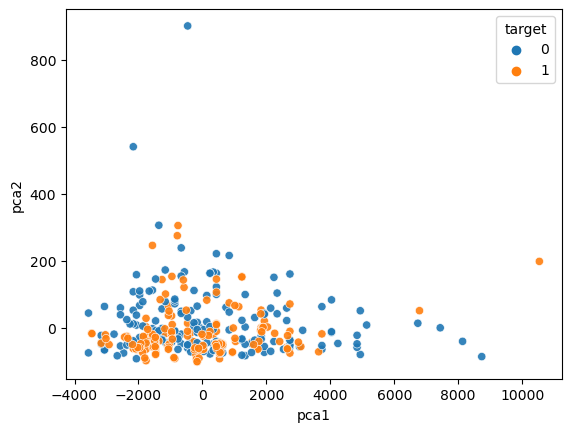

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df, alpha=0.9)
plt.show()

In [285]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(over_X_train, over_y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = over_y_train

In [286]:
lda_train_df

,lda1,target
0,0.025733,0
1,-1.984288,0
2,-3.591197,0
3,-1.847391,0
4,-1.251705,0
...,...,...
341,-0.437545,1
342,2.161186,1
343,2.251590,1
344,2.394770,1


In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {'rfc__max_depth': [21,22,23], 'rfc__min_samples_split': [14,15,16]}
rfc = RandomForestClassifier(random_state=124)

pipe = Pipeline([('std', StandardScaler()),
                 ('lda', LinearDiscriminantAnalysis(n_components=1)),
                 ('rfc', rfc)])

g_rfc = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')
g_rfc.fit(over_X_train, over_y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('lda',
                                        LinearDiscriminantAnalysis(n_components=1)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=124))]),
             param_grid={'rfc__max_depth': [21, 22, 23],
                         'rfc__min_samples_split': [14, 15, 16]},
             scoring='accuracy')

In [316]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 21, 'rfc__min_samples_split...",0.872864,1
1,"{'rfc__max_depth': 21, 'rfc__min_samples_split...",0.872864,1
2,"{'rfc__max_depth': 21, 'rfc__min_samples_split...",0.872864,1
3,"{'rfc__max_depth': 22, 'rfc__min_samples_split...",0.872864,1
4,"{'rfc__max_depth': 22, 'rfc__min_samples_split...",0.872864,1
5,"{'rfc__max_depth': 22, 'rfc__min_samples_split...",0.872864,1
6,"{'rfc__max_depth': 23, 'rfc__min_samples_split...",0.872864,1
7,"{'rfc__max_depth': 23, 'rfc__min_samples_split...",0.872864,1
8,"{'rfc__max_depth': 23, 'rfc__min_samples_split...",0.872864,1


In [317]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[39  4]
 [ 4 14]]
정확도: 0.8689, 정밀도: 0.7778, 재현율: 0.7778, F1: 0.7778, ROC_AUC: 0.8424
################################################################################


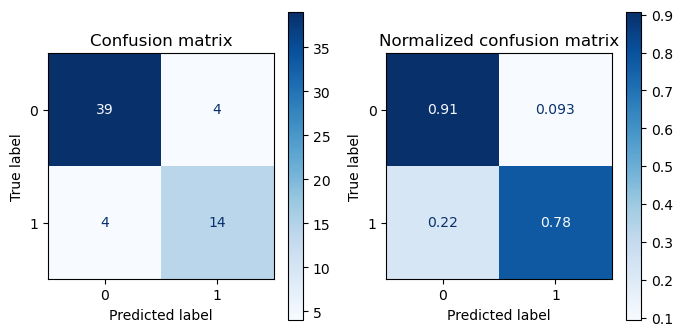

In [318]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)

### 💡 1 Cycle Result 01
> lda를 사용한 차원 축소 결과 86 %의 정확도와 0.77의 F1 Score를 보인다.

In [304]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {'rfc__max_depth': [21,22,23], 'rfc__min_samples_split': [14,15,16]}
rfc = RandomForestClassifier(random_state=124)

pipe = Pipeline([('std', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('rfc', rfc)])

g_rfc = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')
g_rfc.fit(over_X_train, over_y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=124))]),
             param_grid={'rfc__max_depth': [21, 22, 23],
                         'rfc__min_samples_split': [14, 15, 16]},
             scoring='accuracy')

In [305]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[39  4]
 [ 6 12]]
정확도: 0.8361, 정밀도: 0.7500, 재현율: 0.6667, F1: 0.7059, ROC_AUC: 0.7868
################################################################################


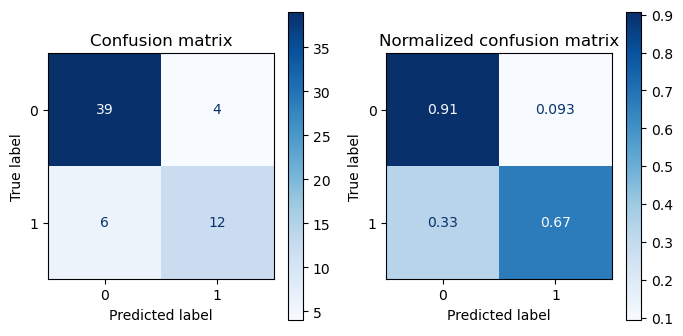

In [306]:
p_rfc = g_rfc.best_estimator_
prediction = p_rfc.predict(X_test)
get_evaluation(y_test, prediction, p_rfc, X_test)

### 💡 1 Cycle Result 02
> pca를 사용한 차원 축소 결과 83 %의 정확도와 0.70의 F1 Score를 보인다.

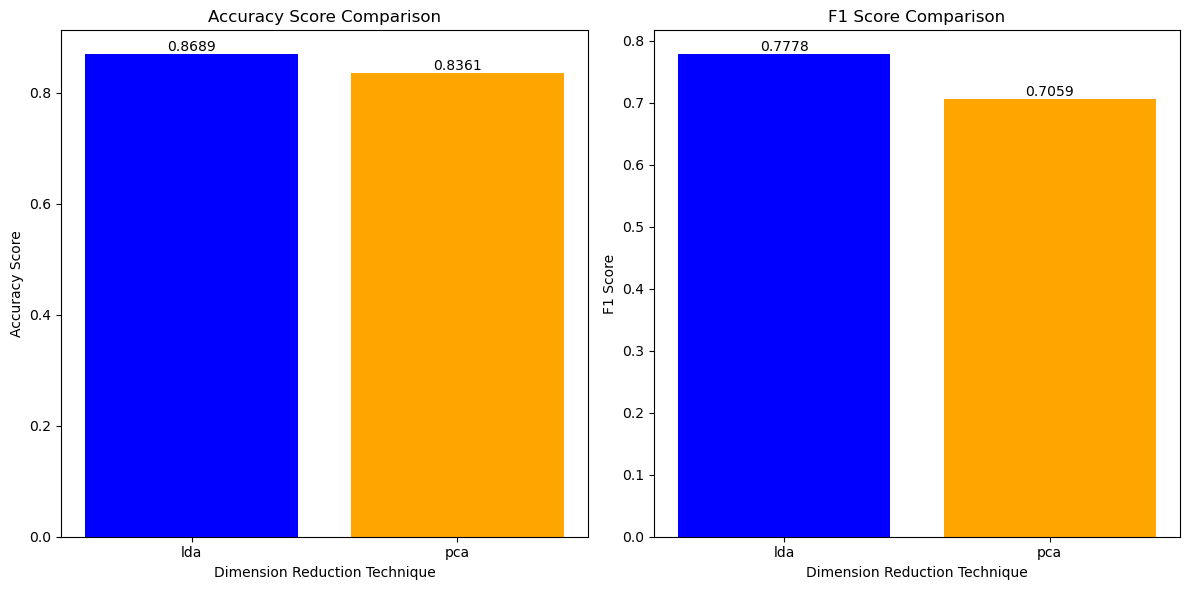

In [300]:
import matplotlib.pyplot as plt

acc_score = [0.8689, 0.8361]
f1_score = [0.7778, 0.7059]
dimension = ['lda', 'pca']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue', 'orange'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue', 'orange'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


### ✨ 1 Cycle Total Result
> 차원축소를 통해서 해당 분류 모델을 분석할 경우에는 확실히 LDA기법을 사용해서 차원 축소를 하는게 적합합니다.

### ✨ 2 Cycle
> RandomForest 알고리즘을 사용한 차원축소 데이터에 Threshold 조절 

#### 📌 오차행렬 정리
- 관상동맥질환의 치사량 분석 데이터
- TP) 실제 관상동맥 질환으로 인한 치사량이 높은 환자를 치사량 위험군으로 잘 분류한 경우
- FP) 치사량 위험군 환자로 예측하였는데 실제로는 치사량으로부터 안전한 환자인 경우 - error 1
- TN) 실제 관상동맥 질환으로부터 안전한 환자를 치사량으로 부터 안전한 환자로 잘 분류한 경우
- FN) 치사량으로부터 안전한 환자로 예측하였는데 실제로는 치사량 위험군 환자인 경우 - error 2

- **FN에 해당하는 ERROR2의 경우가 더 치명적이기 때문에 임계치를 낮추어서 재현율을 높여야 합니다!**

In [319]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)

In [320]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [321]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[39  4]
 [ 4 14]]
정확도: 0.8689, 정밀도: 0.7778, 재현율: 0.7778, F1: 0.7778, ROC-AUC: 0.8424
################################################################################


In [324]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
오차 행렬
[[29 14]
 [ 2 16]]
정확도: 0.7377, 정밀도: 0.5333, 재현율: 0.8889, F1: 0.6667, ROC-AUC: 0.7817
################################################################################
0.2
오차 행렬
[[29 14]
 [ 2 16]]
정확도: 0.7377, 정밀도: 0.5333, 재현율: 0.8889, F1: 0.6667, ROC-AUC: 0.7817
################################################################################
0.24
오차 행렬
[[31 12]
 [ 2 16]]
정확도: 0.7705, 정밀도: 0.5714, 재현율: 0.8889, F1: 0.6957, ROC-AUC: 0.8049
################################################################################
0.3
오차 행렬
[[33 10]
 [ 2 16]]
정확도: 0.8033, 정밀도: 0.6154, 재현율: 0.8889, F1: 0.7273, ROC-AUC: 0.8282
################################################################################
0.4
오차 행렬
[[34  9]
 [ 2 16]]
정확도: 0.8197, 정밀도: 0.6400, 재현율: 0.8889, F1: 0.7442, ROC-AUC: 0.8398
################################################################################
0.47
오차 행렬
[[39  4]
 [ 3 15]]
정확도: 0.8852, 정밀도: 0.7895, 재현율: 0.8333, F1: 0.8108, ROC-AUC: 0.8702
################

#### 임계치(Threshold)를 0.47로 낮춰서 재현율을 높혀야 합니다.

In [325]:
from sklearn.preprocessing import Binarizer

threshold = 0.47

proba = rfc.predict_proba(X_test)
prediction = rfc.predict(X_test)

In [326]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [327]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[39  4]
 [ 3 15]]
정확도: 0.8852, 정밀도: 0.7895, 재현율: 0.8333, F1: 0.8108, ROC-AUC: 0.8702
################################################################################


#### 💡 임계치를 0.47로 낮춘 결과 정확도는 기존 0.86에서 0.88로 높아졌으며 재현율 또한 0.77에서 0.81로 높아졌고,  
#### 또한 F1 Score 역시 점수가 높하졌습니다. 이로써 얻고자 하는 최종 결과를 얻을 수 있었습니다.

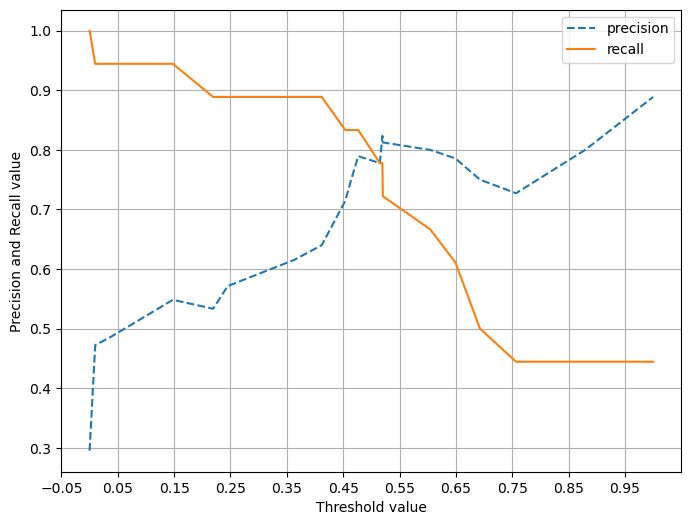

In [350]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))


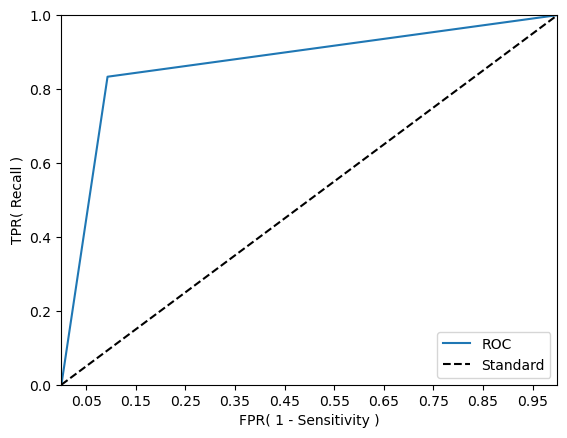

In [330]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


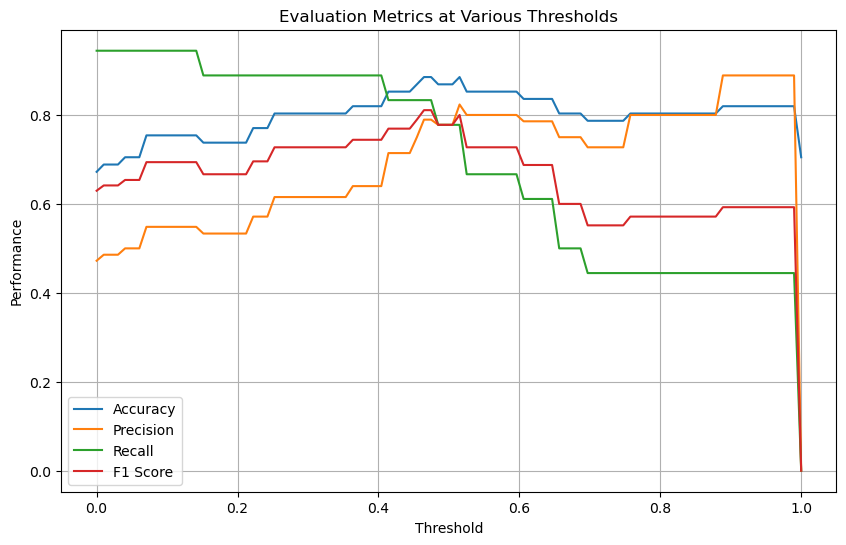

In [334]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

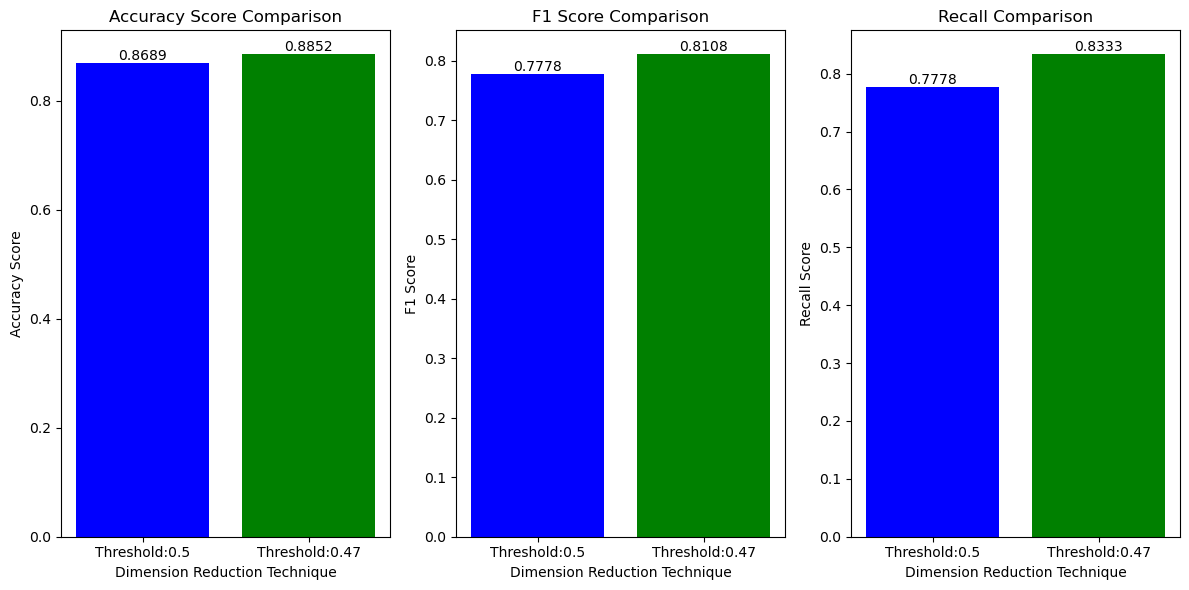

In [362]:
import matplotlib.pyplot as plt
# 정확도: 0.8852, 정밀도: 0.7895, 재현율: 0.8333, F1: 0.8108, ROC-AUC: 0.8702
acc_score = [0.8689, 0.8852]
f1_score = [0.7778, 0.8108]
recall_score = [0.7778, 0.8333]

dimension = ['Threshold:0.5', 'Threshold:0.47']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction Technique')
axes[1].set_ylabel('F1 Score')

# Recall 스코어 바 차트
for i in range(len(dimension)):
    axes[2].bar(dimension[i], recall_score[i], color=['blue',  'green'][i])
    axes[2].text(dimension[i], recall_score[i], f'{recall_score[i]:.4f}', ha='center', va='bottom')

axes[2].set_title('Recall Comparison')
axes[2].set_xlabel('Dimension Reduction Technique')
axes[2].set_ylabel('Recall Score')

plt.tight_layout()
plt.show()

### 💡 2 Cycle Result
- LDA 로 차원축소를 하였을 때, bagging 분류모델 같은 경우 Threshold를 0.47로 낮춰주어야 최적의 결과를 얻을 수 있었습니다.

### ✨ 3 Cycle
> 차원 축소 후 (LDA) 로지스틱 회귀 분석

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 파라미터 그리드 정의
parameters = {'lg__C': [0.1, 1, 10], 'lg__penalty': ['l1', 'l2']}

# Logistic Regression 객체 생성
lg = LogisticRegression(solver='liblinear', random_state=124)

# 파이프라인 정의
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('lg', lg)
])

# 그리드 서치 객체 생성
g_lg = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')

# 모델 훈련
g_lg.fit(over_X_train, over_y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters for Logistic Regression:", g_lg.best_params_)


Best parameters for Logistic Regression: {'lg__C': 1, 'lg__penalty': 'l2'}


In [296]:
result_df = pd.DataFrame(g_lg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'lg__C': 0.1, 'lg__penalty': 'l1'}",0.867116,6
1,"{'lg__C': 0.1, 'lg__penalty': 'l2'}",0.869990,5
2,"{'lg__C': 1, 'lg__penalty': 'l1'}",0.872864,4
3,"{'lg__C': 1, 'lg__penalty': 'l2'}",0.872889,1
4,"{'lg__C': 10, 'lg__penalty': 'l1'}",0.872889,1
5,"{'lg__C': 10, 'lg__penalty': 'l2'}",0.872889,1


In [297]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[37  6]
 [ 4 14]]
정확도: 0.8361, 정밀도: 0.7000, 재현율: 0.7778, F1: 0.7368, ROC_AUC: 0.8191
################################################################################


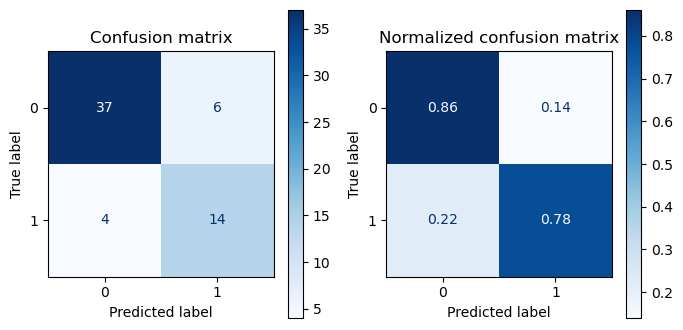

In [298]:
lg = g_lg.best_estimator_
prediction = lg.predict(X_test)
get_evaluation(y_test, prediction, lg, X_test)

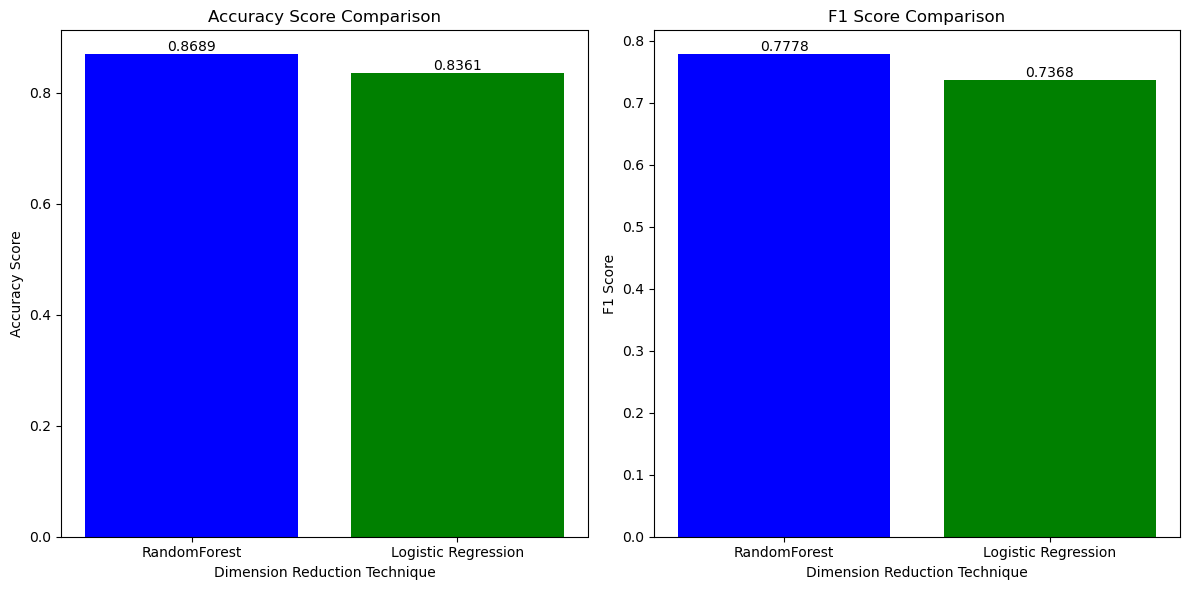

In [303]:
import matplotlib.pyplot as plt

acc_score = [0.8689, 0.8361]
f1_score = [0.7778, 0.7368]
dimension = ['RandomForest',  'Logistic Regression']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


### 💡 3 Cycle Result
> 기존 차원축소를 한 데이터에 Bagging 분류모델을 사용한 결과와 Logistic Regression모델을 사용한 결과를 비교 해보면
>
> Bagging 분류 모델의 성능이 더 좋은 것을 알 수 있습니다.
>
> 그러나 Logistic Regression 모델 또한 괜찮은 성능을 보이는 것을 알 수 있습니다. 

### ✨ 4 Cycle
> Logistic Regression으로 분류한 데이터에 임계치(Threshold) 조절 시행

In [335]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [338]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [339]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[37  6]
 [ 4 14]]
정확도: 0.8361, 정밀도: 0.7000, 재현율: 0.7778, F1: 0.7368, ROC_AUC: 0.8191
################################################################################


In [342]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
오차 행렬
[[31 12]
 [ 2 16]]
정확도: 0.7705, 정밀도: 0.5714, 재현율: 0.8889, F1: 0.6957, ROC_AUC: 0.8049
################################################################################
0.2
오차 행렬
[[33 10]
 [ 2 16]]
정확도: 0.8033, 정밀도: 0.6154, 재현율: 0.8889, F1: 0.7273, ROC_AUC: 0.8282
################################################################################
0.24
오차 행렬
[[33 10]
 [ 3 15]]
정확도: 0.7869, 정밀도: 0.6000, 재현율: 0.8333, F1: 0.6977, ROC_AUC: 0.8004
################################################################################
0.3
오차 행렬
[[33 10]
 [ 3 15]]
정확도: 0.7869, 정밀도: 0.6000, 재현율: 0.8333, F1: 0.6977, ROC_AUC: 0.8004
################################################################################
0.4
오차 행렬
[[36  7]
 [ 3 15]]
정확도: 0.8361, 정밀도: 0.6818, 재현율: 0.8333, F1: 0.7500, ROC_AUC: 0.8353
################################################################################
0.47
오차 행렬
[[36  7]
 [ 4 14]]
정확도: 0.8197, 정밀도: 0.6667, 재현율: 0.7778, F1: 0.7179, ROC_AUC: 0.8075
################

#### 임계치를 0.4로 낮춰서 재현율을 높혀야 합니다.

In [344]:
from sklearn.preprocessing import Binarizer

threshold = 0.4

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [347]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[36  7]
 [ 3 15]]
정확도: 0.8361, 정밀도: 0.6818, 재현율: 0.8333, F1: 0.7500, ROC_AUC: 0.8353
################################################################################


#### 💡 임계치를 0.4로 낮춘 결과 정확도는 기존 0.8361과 동일하고  재현율은 기존 0.7778에서 0.8333으로 높힐 수 있었고,   
#### F1 Score 또한 0.7368에서 0.75로 높아졌습니다.
#### 이로써 로지스틱회귀를 사용하여 얻고자 하는 최종 결과를 얻을 수 있었습니다.

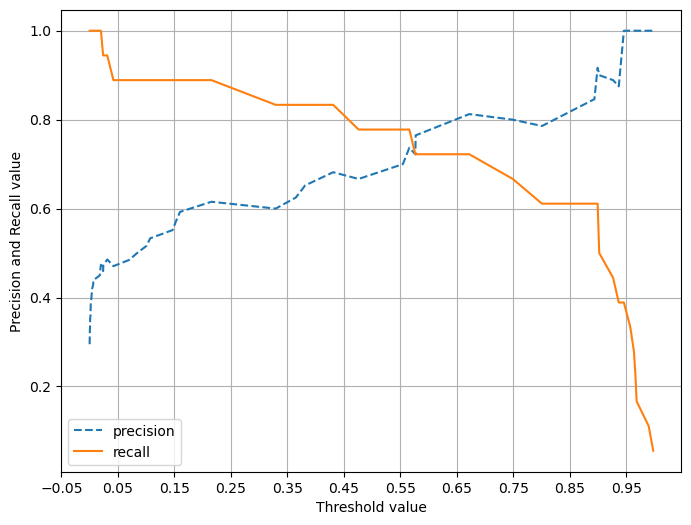

In [349]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

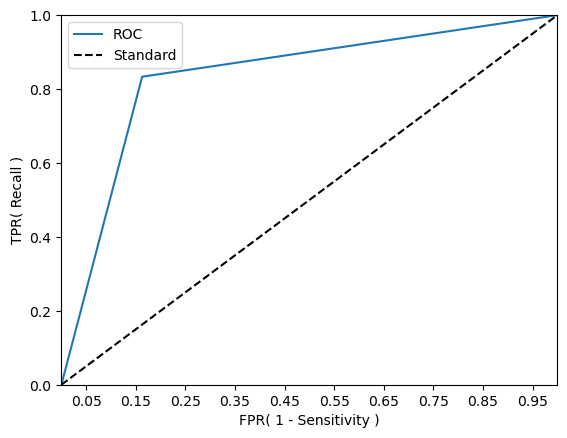

In [352]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

In [353]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


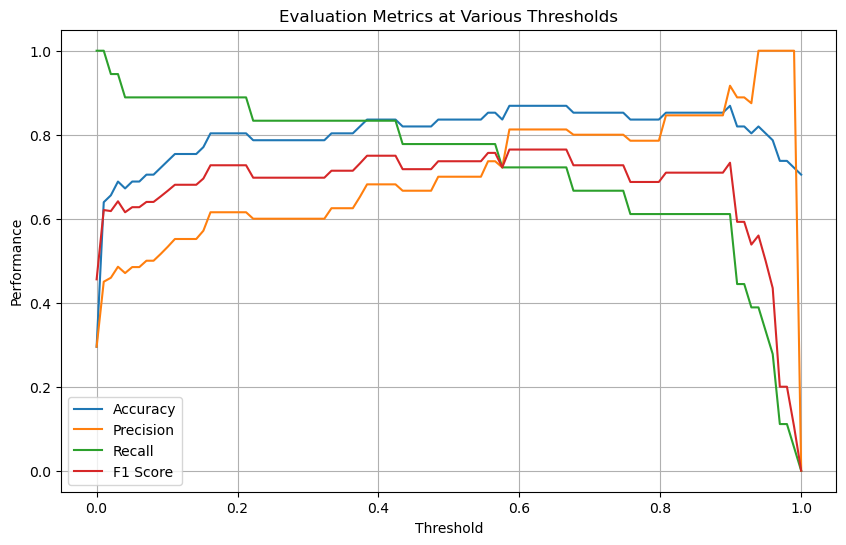

In [355]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

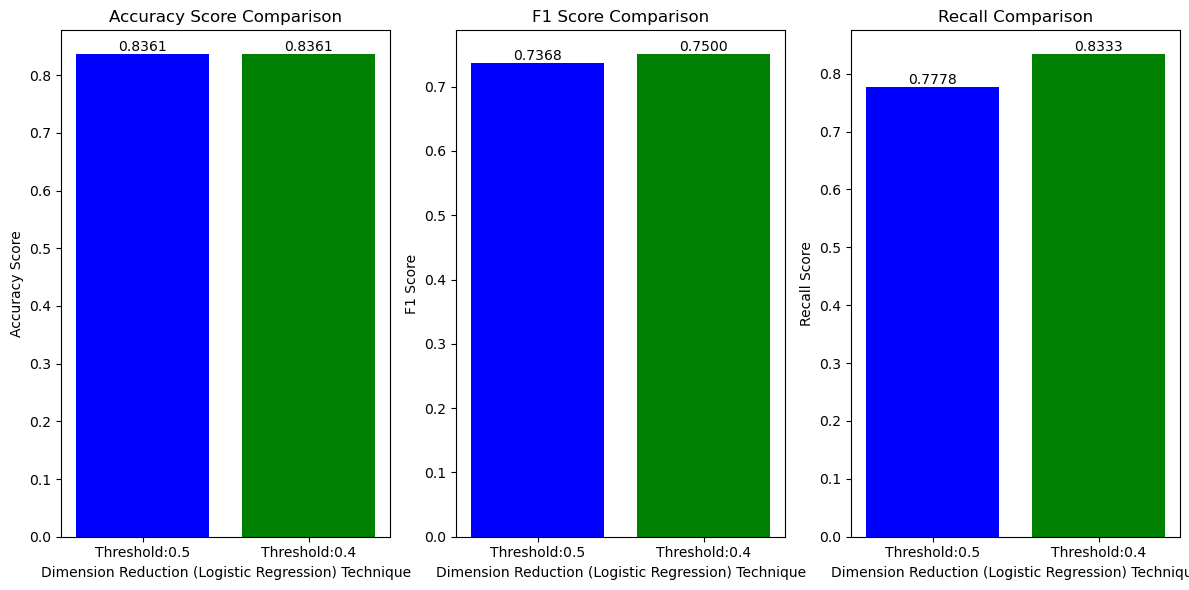

In [363]:
import matplotlib.pyplot as plt
# 정확도: 0.8361, 정밀도: 0.6818, 재현율: 0.8333, F1: 0.7500, ROC_AUC: 0.8353

acc_score = [0.8361, 0.8361]
f1_score = [0.7368, 0.7500]
recall_score = [0.7778, 0.8333]

dimension = ['Threshold:0.5', 'Threshold:0.4']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# 정확도 점수 바 차트
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 스코어 바 차트
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[1].set_ylabel('F1 Score')

# Recall 스코어 바 차트
for i in range(len(dimension)):
    axes[2].bar(dimension[i], recall_score[i], color=['blue',  'green'][i])
    axes[2].text(dimension[i], recall_score[i], f'{recall_score[i]:.4f}', ha='center', va='bottom')

axes[2].set_title('Recall Comparison')
axes[2].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[2].set_ylabel('Recall Score')

plt.tight_layout()
plt.show()

### 💡 4 Cycle Result
> 로지스틱 회귀기법을 사용해서 차원축소를 한 결과 임계치를 0.4로 낮출 경우 정확도 점수는 기존과 동일 하지만 나머지 F1 Score와 재현율이 높아지므로
>
> 임계치를 0.4로 낮출 때 최적의 결과를 얻을 수 있었습니다.